# Here we are trying to analyze what makes a Spotify song popular.For this we will follow basic Data Mining Process 

Business Understanding

Data Understanding

Prepare Data

Data Modeling

Evaluate the Results

Deploy

# Business Undestanding

* What features are necessary for a track to become a hit?
* 
* Is a track that sounds happier and euphoric is more popular than one that sounds sadder or angry?
* 
* What features are necessary for a track to be danceable.
* 
* Why Pink Floyd tracks are not popular than the rest of the tracks that are?
* 

# **Understanding de Data**

In [1]:
library(tidyverse)
library(corrplot)
library(RColorBrewer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

corrplot 0.88 loaded



In [2]:
music <- read.csv("../input/spotifydata-19212020/data.csv")

In [3]:
head(music)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
,<dbl>,<chr>,<dbl>,<int>,<dbl>,<int>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>
1,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
2,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
3,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
4,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
5,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
6,0.995,"['Felix Mendelssohn', 'Vladimir Horowitz']",0.424,352600,0.1200,0,6NxAf7M8DNHOBTmEd3JSO5,0.911,6,0.0915,-19.242,0,Scherzo a capriccio: Presto,0,1928,0.0593,63.521,0.2660,1928


Below are the main columns of the data set and how they actually reflect the values in the data.

Popularity: Popularity fo the song. The value will be between 0 and 100, with 100 being the most popular.

durantion_ms: The duration of the track in milliseconds.

explicit: Whether or not the track has explicit lyrics ( true = yes it does; false = no it does not OR unknown).

danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

loudness:The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [4]:
summary(music)

  acousticness      artists           danceability     duration_ms     
 Min.   :0.0000   Length:169909      Min.   :0.0000   Min.   :   5108  
 1st Qu.:0.0945   Class :character   1st Qu.:0.4170   1st Qu.: 171040  
 Median :0.4920   Mode  :character   Median :0.5480   Median : 208600  
 Mean   :0.4932                      Mean   :0.5381   Mean   : 231406  
 3rd Qu.:0.8880                      3rd Qu.:0.6670   3rd Qu.: 262960  
 Max.   :0.9960                      Max.   :0.9880   Max.   :5403500  
     energy          explicit            id            instrumentalness  
 Min.   :0.0000   Min.   :0.00000   Length:169909      Min.   :0.000000  
 1st Qu.:0.2630   1st Qu.:0.00000   Class :character   1st Qu.:0.000000  
 Median :0.4810   Median :0.00000   Mode  :character   Median :0.000204  
 Mean   :0.4886   Mean   :0.08486                      Mean   :0.161937  
 3rd Qu.:0.7100   3rd Qu.:0.00000                      3rd Qu.:0.086800  
 Max.   :1.0000   Max.   :1.00000                   

Rescaling the duration of the songs so that helps to easily identify the values

In [5]:
music$duration_ms <- music$duration_ms /1000


Cleaning the data and removing brackets, Apostophes

In [6]:
music$artists <- gsub("\\[|\\]", "", music$artists)
music$artists <- gsub("'","",music$artists)

In [7]:
head(music)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>
1,0.995,Carl Woitschach,0.708,158.648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
2,0.994,"Robert Schumann, Vladimir Horowitz",0.379,282.133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
3,0.604,Seweryn Goszczyński,0.749,104.300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
4,0.995,Francisco Canaro,0.781,180.760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
5,0.990,"Frédéric Chopin, Vladimir Horowitz",0.210,687.733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
6,0.995,"Felix Mendelssohn, Vladimir Horowitz",0.424,352.600,0.1200,0,6NxAf7M8DNHOBTmEd3JSO5,0.911,6,0.0915,-19.242,0,Scherzo a capriccio: Presto,0,1928,0.0593,63.521,0.2660,1928


In [8]:

music_clean <- music %>% select(-c(id,))

We are trying to find coorelation among various values. We are also removing categorical values since coorelation plot only results in numeric numbers

In [9]:

#COL1(sequential = c("Oranges", "Purples", "Reds", "Blues", "Greens", 
                    #"Greys", "OrRd", "YlOrRd", "YlOrBr", "YlGn"), n = 200)

#COL2(diverging = c("RdBu", "BrBG", "PiYG", "PRGn", "PuOr", "RdYlBu"), n = 200)

music_corr <- music_clean %>% select(-c(artists,name,release_date))

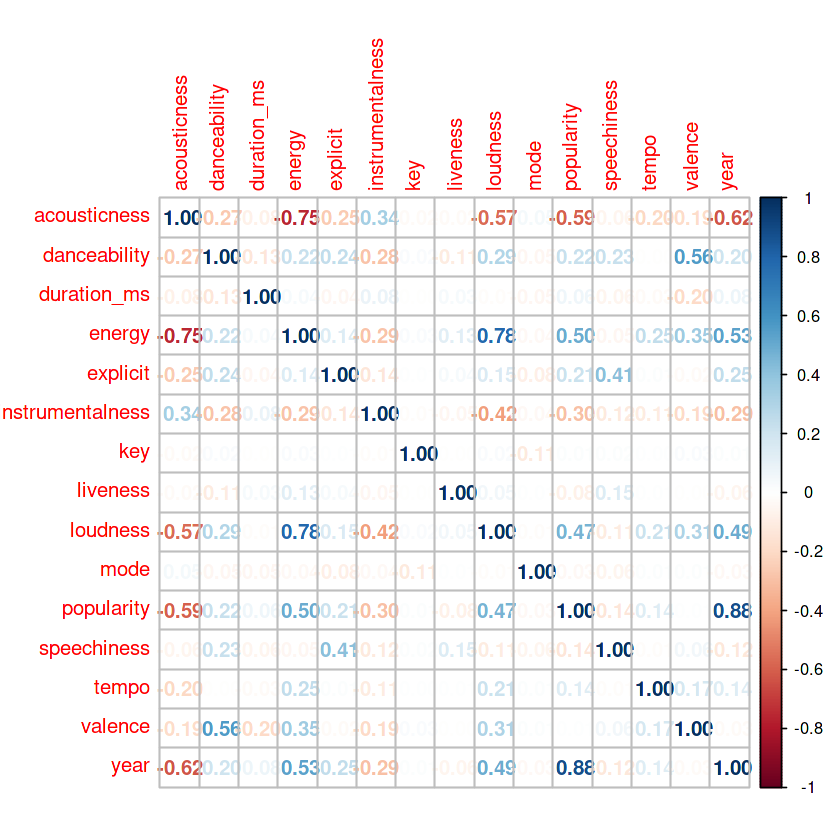

In [10]:
cor_plot <- cor(music_corr)

corrplot(cor_plot, method = 'number')



Rearranging the columns

In [11]:
#head(music_clean)

music_clean <- music_clean[,c(12,13,2,15,18,1,3,4,5,6,7,8,9,10,11,14,16,17)]

head(music_clean)

,name,popularity,artists,speechiness,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,tempo,valence
,<chr>,<int>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>
1,Singende Bataillone 1. Teil,0,Carl Woitschach,0.0506,1928,0.995,0.708,158.648,0.1950,0,0.563,10,0.1510,-12.428,1,1928,118.469,0.7790
2,"Fantasiestücke, Op. 111: Più tosto lento",0,"Robert Schumann, Vladimir Horowitz",0.0462,1928,0.994,0.379,282.133,0.0135,0,0.901,8,0.0763,-28.454,1,1928,83.972,0.0767
3,Chapter 1.18 - Zamek kaniowski,0,Seweryn Goszczyński,0.9290,1928,0.604,0.749,104.300,0.2200,0,0.000,5,0.1190,-19.924,0,1928,107.177,0.8800
4,Bebamos Juntos - Instrumental (Remasterizado),0,Francisco Canaro,0.0926,1928,0.995,0.781,180.760,0.1300,0,0.887,1,0.1110,-14.734,0,1928-09-25,108.003,0.7200
5,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,"Frédéric Chopin, Vladimir Horowitz",0.0424,1928,0.990,0.210,687.733,0.2040,0,0.908,11,0.0980,-16.829,1,1928,62.149,0.0693
6,Scherzo a capriccio: Presto,0,"Felix Mendelssohn, Vladimir Horowitz",0.0593,1928,0.995,0.424,352.600,0.1200,0,0.911,6,0.0915,-19.242,0,1928,63.521,0.2660


In [12]:
colnames(music_clean)

[1] "name"             "popularity"       "artists"          "speechiness"     
 [5] "year"             "acousticness"     "danceability"     "duration_ms"     
 [9] "energy"           "explicit"         "instrumentalness" "key"             
[13] "liveness"         "loudness"         "mode"             "release_date"    
[17] "tempo"            "valence"

In [13]:
music_clean <- music_clean %>% select(-c(release_date))

In [14]:
colnames(music_clean)

[1] "name"             "popularity"       "artists"          "speechiness"     
 [5] "year"             "acousticness"     "danceability"     "duration_ms"     
 [9] "energy"           "explicit"         "instrumentalness" "key"             
[13] "liveness"         "loudness"         "mode"             "tempo"           
[17] "valence"

In [15]:
music_df <- music_clean[,c(16,4,8,7,1,2,3,5,6,9,10,11,12,13,14,15,17)]

head(music_df)

,tempo,speechiness,duration_ms,danceability,name,popularity,artists,year,acousticness,energy,explicit,instrumentalness,key,liveness,loudness,mode,valence
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>
1,118.469,0.0506,158.648,0.708,Singende Bataillone 1. Teil,0,Carl Woitschach,1928,0.995,0.1950,0,0.563,10,0.1510,-12.428,1,0.7790
2,83.972,0.0462,282.133,0.379,"Fantasiestücke, Op. 111: Più tosto lento",0,"Robert Schumann, Vladimir Horowitz",1928,0.994,0.0135,0,0.901,8,0.0763,-28.454,1,0.0767
3,107.177,0.9290,104.300,0.749,Chapter 1.18 - Zamek kaniowski,0,Seweryn Goszczyński,1928,0.604,0.2200,0,0.000,5,0.1190,-19.924,0,0.8800
4,108.003,0.0926,180.760,0.781,Bebamos Juntos - Instrumental (Remasterizado),0,Francisco Canaro,1928,0.995,0.1300,0,0.887,1,0.1110,-14.734,0,0.7200
5,62.149,0.0424,687.733,0.210,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,"Frédéric Chopin, Vladimir Horowitz",1928,0.990,0.2040,0,0.908,11,0.0980,-16.829,1,0.0693
6,63.521,0.0593,352.600,0.424,Scherzo a capriccio: Presto,0,"Felix Mendelssohn, Vladimir Horowitz",1928,0.995,0.1200,0,0.911,6,0.0915,-19.242,0,0.2660


Sorting the data based on Popularity of the song since it is the main theme we are trying to analyze

In [16]:
music_popularity_order <- music_df[order(music_df$popularity,decreasing = TRUE),]

head(music_popularity_order)

,tempo,speechiness,duration_ms,danceability,name,popularity,artists,year,acousticness,energy,explicit,instrumentalness,key,liveness,loudness,mode,valence
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>
87943,171.005,0.0598,200.040,0.514,Blinding Lights,100,The Weeknd,2020,0.00146,0.730,0,9.54e-05,1,0.0897,-5.934,1,0.334
87941,89.977,0.1640,181.733,0.746,ROCKSTAR (feat. Roddy Ricch),99,"DaBaby, Roddy Ricch",2020,0.24700,0.690,1,0.00e+00,11,0.1010,-7.956,1,0.497
87950,144.026,0.1350,173.333,0.726,death bed (coffee for your head) (feat. beabadoobee),97,"Powfu, beabadoobee",2020,0.73100,0.431,0,0.00e+00,8,0.6960,-8.765,0,0.348
87942,129.979,0.0514,165.978,0.716,THE SCOTTS,96,"THE SCOTTS, Travis Scott, Kid Cudi",2020,0.23300,0.537,1,0.00e+00,0,0.1570,-7.648,0,0.280
87841,116.971,0.0559,196.653,0.896,The Box,95,Roddy Ricch,2019,0.10400,0.586,1,0.00e+00,10,0.7900,-6.687,0,0.642
87845,128.977,0.0534,223.480,0.863,Supalonely,95,"BENEE, Gus Dapperton",2019,0.30500,0.631,1,3.04e-05,7,0.1230,-4.689,1,0.817


Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




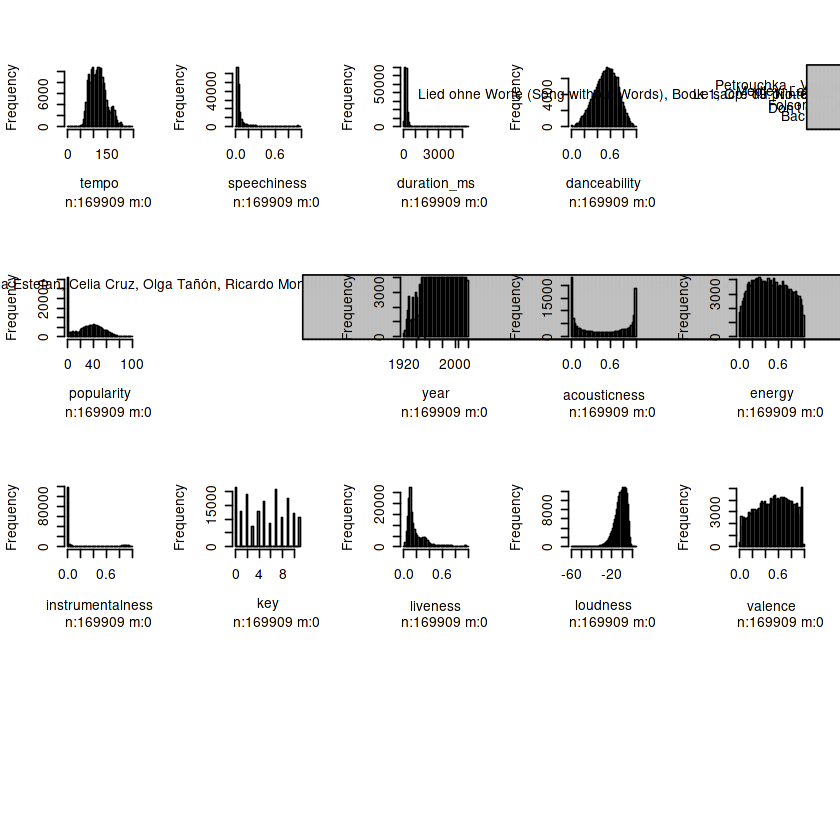

In [17]:
library(Hmisc)

hist.data.frame(music_popularity_order)

Since lot of data, we are only capturing top 10,000 songs.

In [18]:
music_top1000 <- music_popularity_order[1:10000,]

We are trying to plot how pupularity of the song and different features of the song are coorelated to popularity of the song

We find that highly popular songs have low acousticnes.

`geom_smooth()` using formula 'y ~ x'



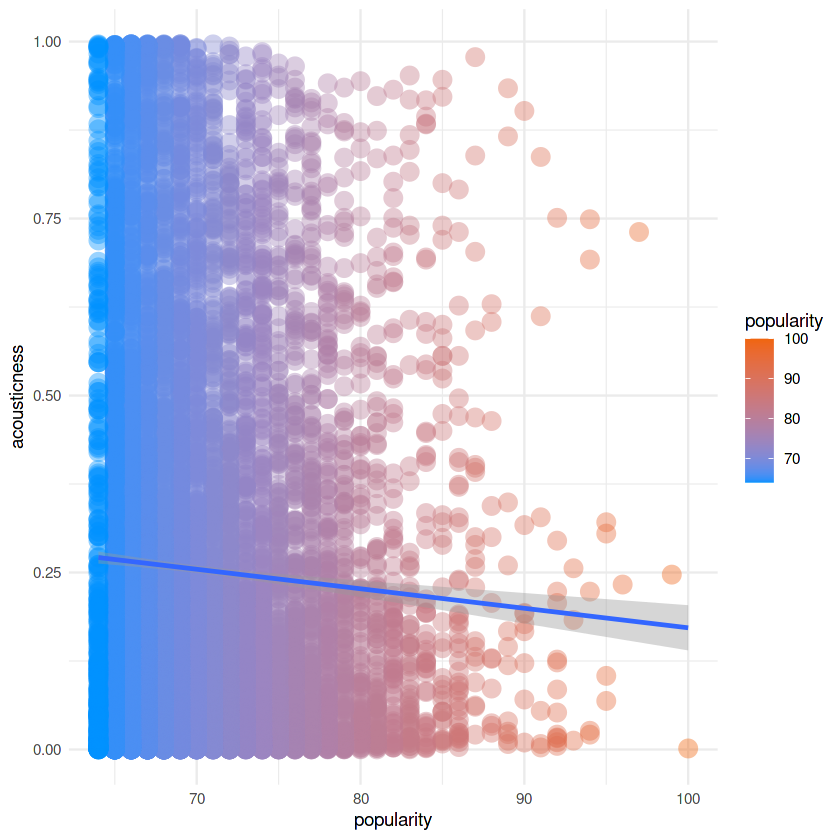

In [19]:
ggplot(music_top1000, aes(popularity, acousticness, color = popularity)) +
  geom_point(shape = 16, size = 5, show.legend = FALSE,alpha=.4) +
  theme_minimal() +
  scale_color_gradient(low = "#0091ff", high = "#f0650e") + geom_smooth(method='lm')

High energy is associated with increased popularity of the song

`geom_smooth()` using formula 'y ~ x'



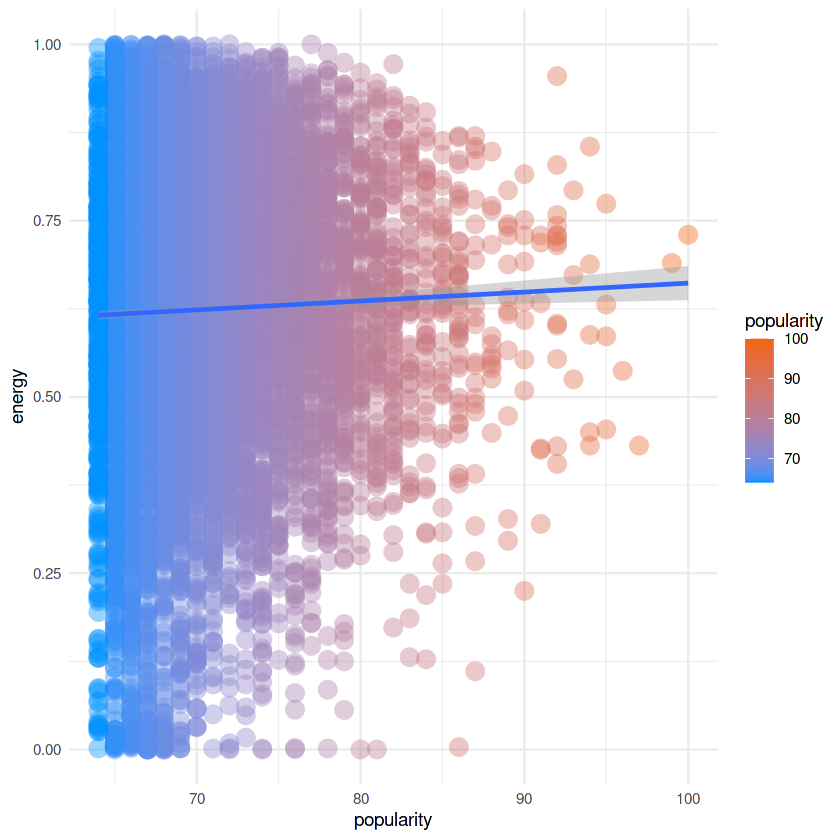

In [20]:
ggplot(music_top1000, aes(popularity,energy, color = popularity)) +
  geom_point(shape = 16, size = 5, show.legend = FALSE,alpha=.4) +
  theme_minimal() +
  scale_color_gradient(low = "#0091ff", high = "#f0650e") + geom_smooth(method='lm')

`geom_smooth()` using formula 'y ~ x'



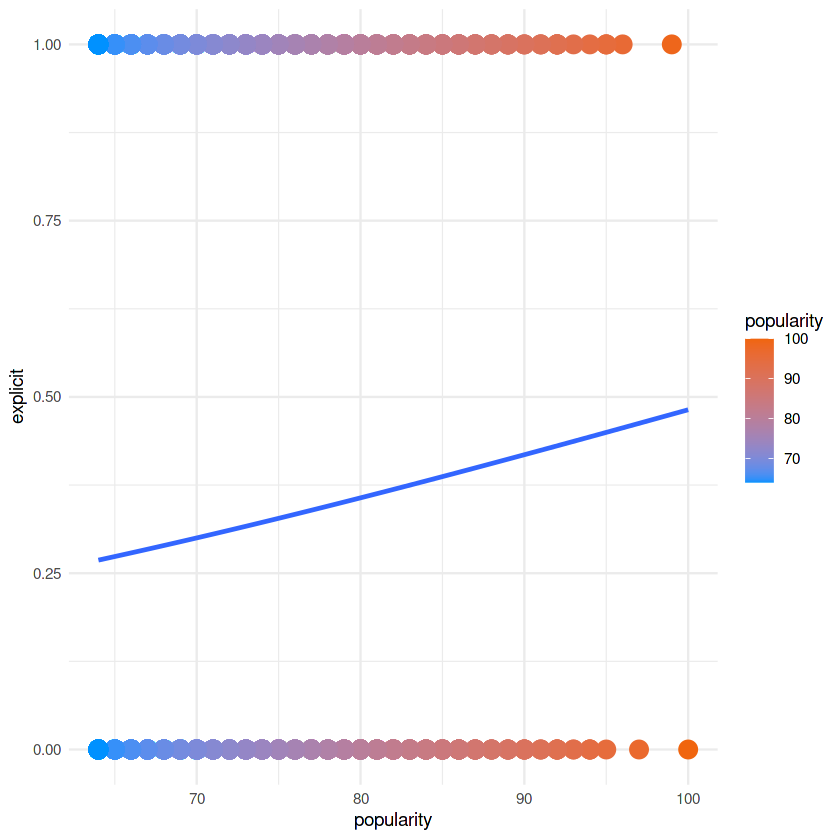

In [21]:
ggplot(music_top1000, aes(popularity,explicit, color = popularity)) +
  geom_point(shape = 16, size = 5, show.legend = FALSE) +
  theme_minimal() +
  scale_color_gradient(low = "#0091ff", high = "#f0650e") + geom_smooth(method='glm',method.args=list(family='binomial'),se=FALSE)

Low intrumentalness is refelcted with more popularity of the song.

`geom_smooth()` using formula 'y ~ x'



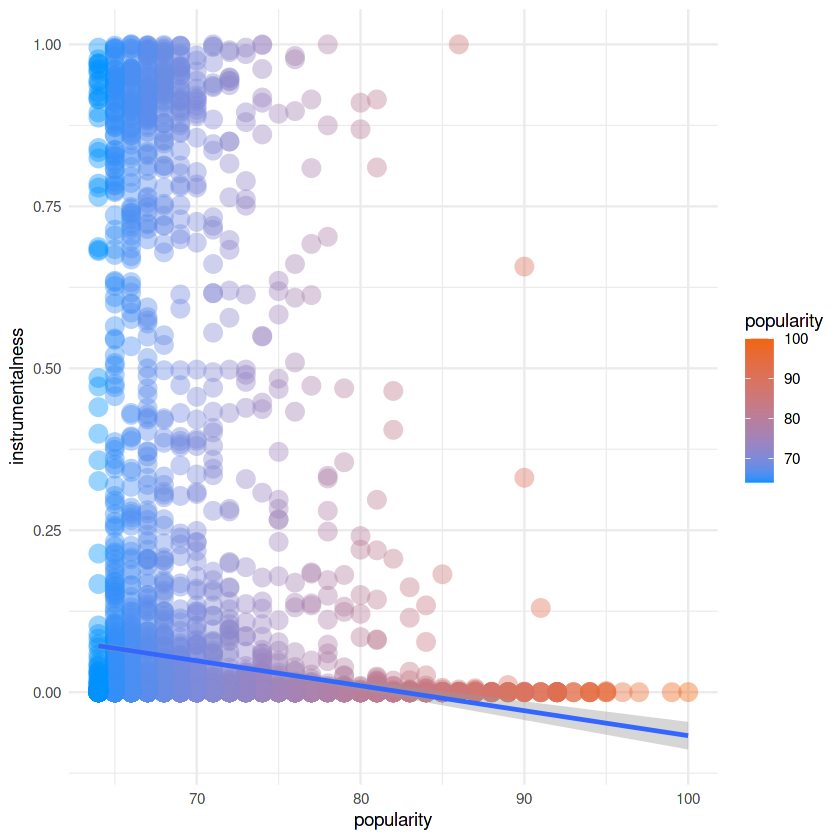

In [22]:
ggplot(music_top1000, aes(popularity,instrumentalness, color = popularity)) +
  geom_point(shape = 16, size = 5, show.legend = FALSE,alpha=.4) +
  theme_minimal() +
  scale_color_gradient(low = "#0091ff", high = "#f0650e") + geom_smooth(method='lm')

Loudness is more related to higher popularity.

`geom_smooth()` using formula 'y ~ x'



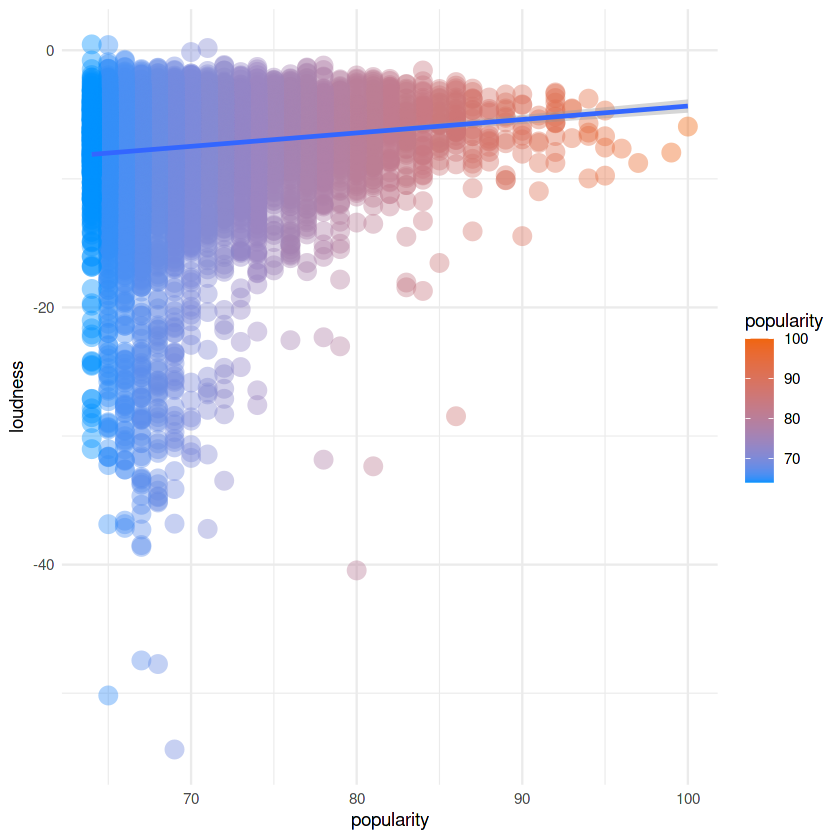

In [23]:
ggplot(music_top1000, aes(popularity,loudness, color = popularity)) +
  geom_point(shape = 16, size = 5, show.legend = FALSE,alpha=.4) +
  theme_minimal() +
  scale_color_gradient(low = "#0091ff", high = "#f0650e") + geom_smooth(method='lm')

`geom_smooth()` using formula 'y ~ x'



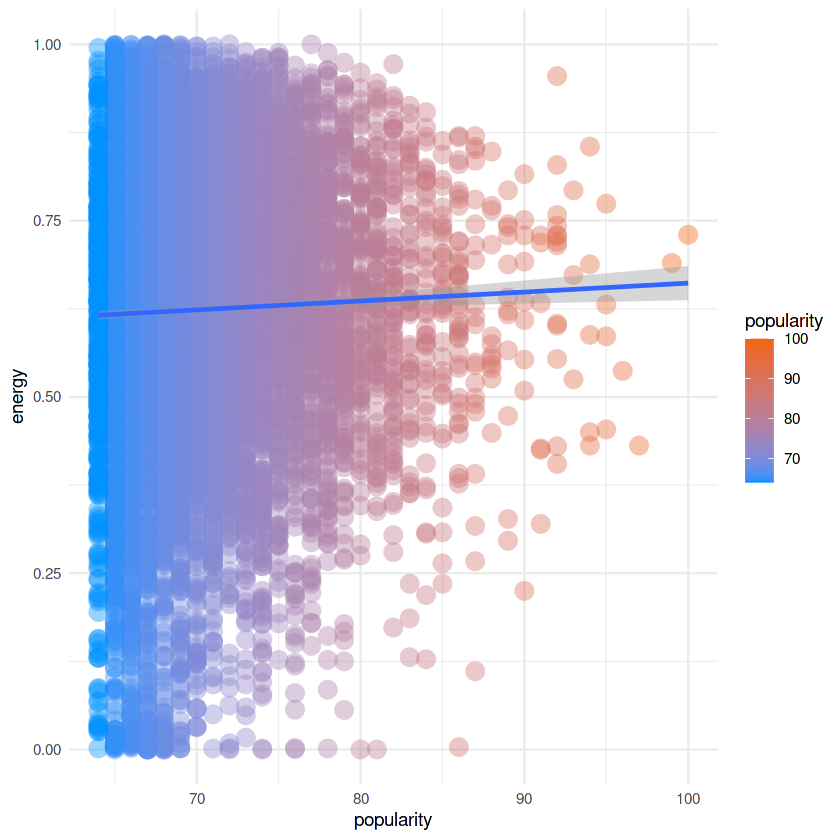

In [24]:
ggplot(music_top1000, aes(popularity,energy, color = popularity)) +
  geom_point(shape = 16, size = 5, show.legend = FALSE,alpha=.4) +
  theme_minimal() +
  scale_color_gradient(low = "#0091ff", high = "#f0650e") + geom_smooth(method='lm')

`geom_smooth()` using formula 'y ~ x'



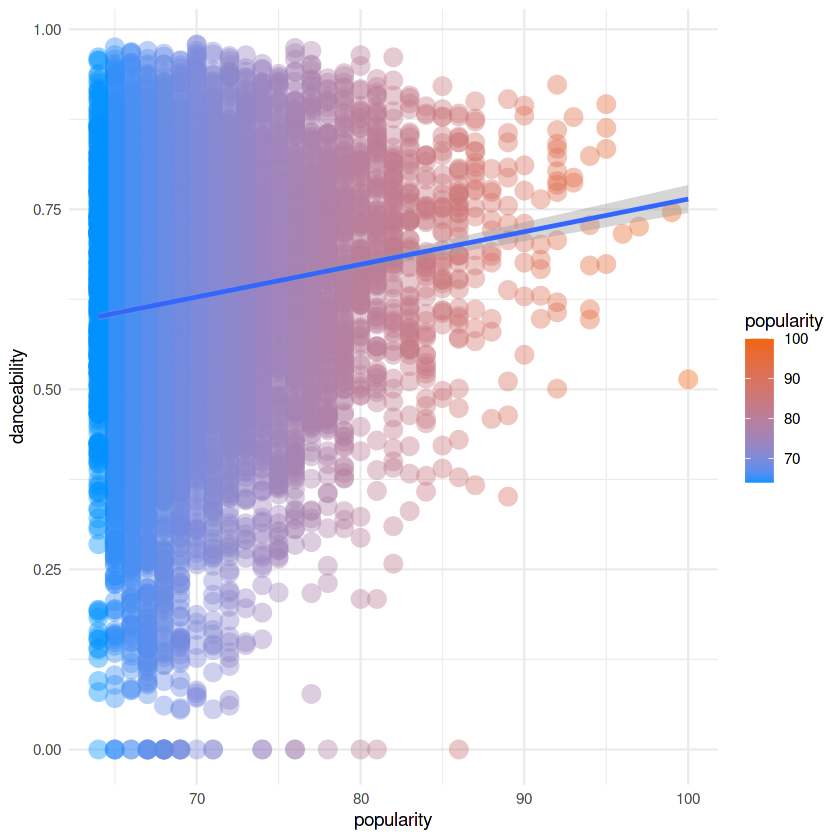

In [25]:
ggplot(music_top1000, aes(popularity, danceability, color = popularity)) +
  geom_point(shape = 16, size = 5, show.legend = FALSE,alpha=.4) +
  theme_minimal() +
  scale_color_gradient(low = "#0091ff", high = "#f0650e")+geom_smooth(method='lm')

Relevant features for a song to become a hit:

Less Acousticness
More Energetic
More Explicit
Less Instrumental
Higher Loudness
More danceable

Question 2: Is a song that sounds sadder or angry can be a hit?

`geom_smooth()` using formula 'y ~ x'



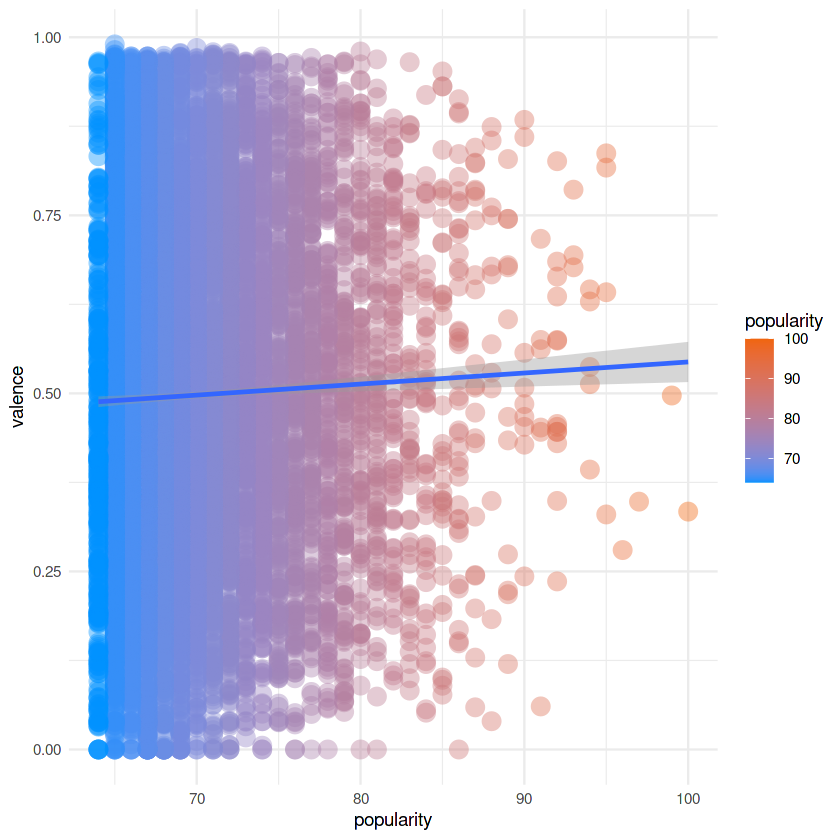

In [26]:
ggplot(music_top1000, aes(popularity,valence, color = popularity)) +
  geom_point(shape = 16, size = 5, show.legend = FALSE,alpha=.4) +
  theme_minimal() +
  scale_color_gradient(low = "#0091ff", high = "#f0650e")+geom_smooth(method='lm')

Question 3: What features are important for a song to be danceable?.

In [27]:
head(music_top1000)

,tempo,speechiness,duration_ms,danceability,name,popularity,artists,year,acousticness,energy,explicit,instrumentalness,key,liveness,loudness,mode,valence
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>
87943,171.005,0.0598,200.040,0.514,Blinding Lights,100,The Weeknd,2020,0.00146,0.730,0,9.54e-05,1,0.0897,-5.934,1,0.334
87941,89.977,0.1640,181.733,0.746,ROCKSTAR (feat. Roddy Ricch),99,"DaBaby, Roddy Ricch",2020,0.24700,0.690,1,0.00e+00,11,0.1010,-7.956,1,0.497
87950,144.026,0.1350,173.333,0.726,death bed (coffee for your head) (feat. beabadoobee),97,"Powfu, beabadoobee",2020,0.73100,0.431,0,0.00e+00,8,0.6960,-8.765,0,0.348
87942,129.979,0.0514,165.978,0.716,THE SCOTTS,96,"THE SCOTTS, Travis Scott, Kid Cudi",2020,0.23300,0.537,1,0.00e+00,0,0.1570,-7.648,0,0.280
87841,116.971,0.0559,196.653,0.896,The Box,95,Roddy Ricch,2019,0.10400,0.586,1,0.00e+00,10,0.7900,-6.687,0,0.642
87845,128.977,0.0534,223.480,0.863,Supalonely,95,"BENEE, Gus Dapperton",2019,0.30500,0.631,1,3.04e-05,7,0.1230,-4.689,1,0.817


In [28]:
dance_music <- music_top1000 %>% select(-c(name,artists,year))

In [29]:
#music_popularity_order <- music_df[order(music_df$popularity,decreasing = TRUE),]

dance_music <- dance_music[order(dance_music$popularity,decreasing = TRUE),]

head(dance_music)

,tempo,speechiness,duration_ms,danceability,popularity,acousticness,energy,explicit,instrumentalness,key,liveness,loudness,mode,valence
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>
87943,171.005,0.0598,200.040,0.514,100,0.00146,0.730,0,9.54e-05,1,0.0897,-5.934,1,0.334
87941,89.977,0.1640,181.733,0.746,99,0.24700,0.690,1,0.00e+00,11,0.1010,-7.956,1,0.497
87950,144.026,0.1350,173.333,0.726,97,0.73100,0.431,0,0.00e+00,8,0.6960,-8.765,0,0.348
87942,129.979,0.0514,165.978,0.716,96,0.23300,0.537,1,0.00e+00,0,0.1570,-7.648,0,0.280
87841,116.971,0.0559,196.653,0.896,95,0.10400,0.586,1,0.00e+00,10,0.7900,-6.687,0,0.642
87845,128.977,0.0534,223.480,0.863,95,0.30500,0.631,1,3.04e-05,7,0.1230,-4.689,1,0.817


Above values have large divergences and differences among them. So it would be hard to analyze them. so we scale the values between 0 and 1 

In [30]:
fun_range <- function(x) {                              # Create user-defined function
  (x - min(x)) / (max(x) - min(x))
}

In [31]:
vec_range2 <- fun_range(dance_music)

In [32]:
head(vec_range2)

,tempo,speechiness,duration_ms,danceability,popularity,acousticness,energy,explicit,instrumentalness,key,liveness,loudness,mode,valence
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
87943,0.12234758,0.02955035,0.1381092,0.02979692,0.08380267,0.02951868,0.02991417,0.02951789,0.02951794,0.03006074,0.02956658,0.02629663,0.03006074,0.02969920
87941,0.07836171,0.02960692,0.1281712,0.02992286,0.08325982,0.02965197,0.02989246,0.03006074,0.02951789,0.03548922,0.02957272,0.02519899,0.03006074,0.02978769
87950,0.10770209,0.02959118,0.1236113,0.02991200,0.08217413,0.02991471,0.02975186,0.02951789,0.02951789,0.03386067,0.02989571,0.02475983,0.02951789,0.02970680
87942,0.10007670,0.02954579,0.1196187,0.02990657,0.08163128,0.02964437,0.02980940,0.03006074,0.02951789,0.02951789,0.02960312,0.02536619,0.02951789,0.02966989
87841,0.09301534,0.02954824,0.1362705,0.03000428,0.08108843,0.02957435,0.02983600,0.03006074,0.02951789,0.03494637,0.02994674,0.02588787,0.02951789,0.02986640
87845,0.09953277,0.02954688,0.1508335,0.02998637,0.08108843,0.02968346,0.02986043,0.03006074,0.02951791,0.03331783,0.02958466,0.02697248,0.03006074,0.02996140


Melting the data to plot the grid

In [33]:
library(reshape)
#colnames(vec_range2)

melting_data <- melt(vec_range2 , id = c('danceability'))


Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename


The following objects are masked from ‘package:tidyr’:

    expand, smiths




In [34]:
head(melting_data)

,danceability,variable,value
,<dbl>,<fct>,<dbl>
1,0.02979692,tempo,0.12234758
2,0.02992286,tempo,0.07836171
3,0.02991200,tempo,0.10770209
4,0.02990657,tempo,0.10007670
5,0.03000428,tempo,0.09301534
6,0.02998637,tempo,0.09953277


In [35]:
summary(melting_data)

  danceability             variable         value        
 Min.   :0.02952   tempo       :10000   Min.   :0.00000  
 1st Qu.:0.02981   speechiness :10000   1st Qu.:0.02953  
 Median :0.02987   duration_ms :10000   Median :0.02977  
 Mean   :0.02986   popularity  :10000   Mean   :0.04662  
 3rd Qu.:0.02992   acousticness:10000   3rd Qu.:0.03386  
 Max.   :0.03005   energy      :10000   Max.   :1.00000  
                   (Other)     :70000                    

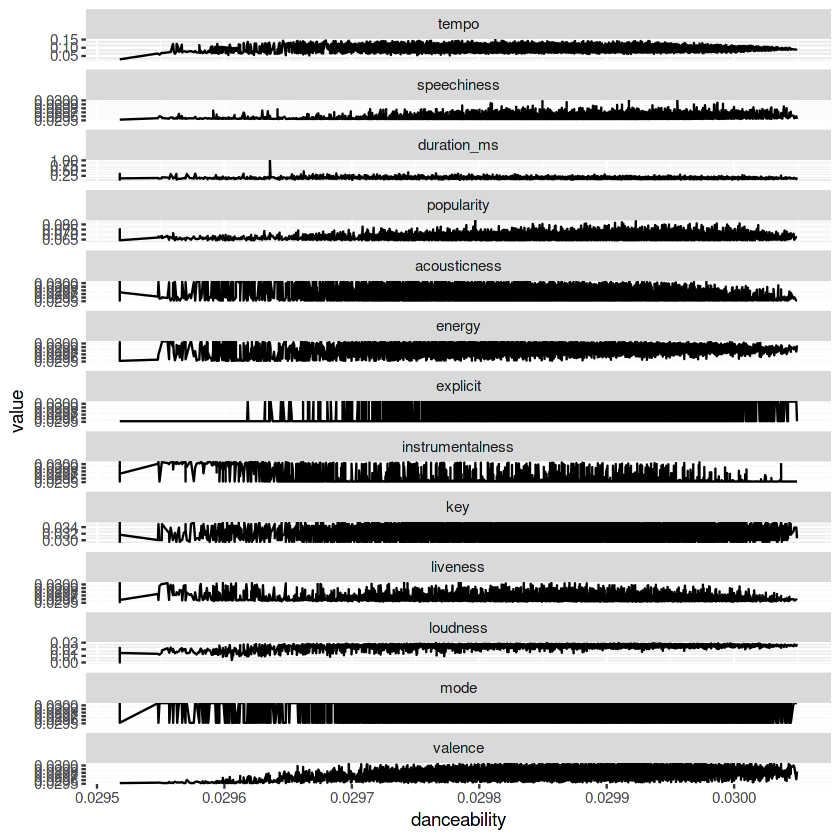

In [36]:
ggplot(melting_data, aes(danceability, value)) + 
  geom_line() + 
  facet_wrap(~variable, scales = "free_y", ncol = 1)

Features for a song to be danceable:

Popularity
Explicit
Energy
Loudness
Valence

Question 4: Why Pink Floyd songs are not popular than the rest of the songs that are?

In [37]:
df_pink_floyd <- subset(music_top1000,music_top1000$artists== 'Pink Floyd')

In [38]:
#head(df_pink_floyd)

df_pink_floyd[order(df_pink_floyd$popularity,decreasing = TRUE),]

,tempo,speechiness,duration_ms,danceability,name,popularity,artists,year,acousticness,energy,explicit,instrumentalness,key,liveness,loudness,mode,valence
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>
83444,122.883,0.0414,334.744,0.481,Wish You Were Here,76,Pink Floyd,1975,0.7350,0.262,0,0.011400,7,0.8320,-15.730,1,0.3750
83844,104.126,0.0428,238.747,0.694,"Another Brick in the Wall, Pt. 2",76,Pink Floyd,1979,0.0781,0.394,0,0.000677,0,0.2470,-15.881,1,0.7190
83843,127.167,0.0286,382.297,0.472,Comfortably Numb,74,Pink Floyd,1979,0.1500,0.366,0,0.308000,11,0.0837,-12.595,0,0.1710
83251,124.193,0.1520,382.834,0.469,Money,73,Pink Floyd,1973,0.0241,0.537,0,0.002010,9,0.2690,-10.421,1,0.7830
83259,120.317,0.0849,413.947,0.358,Time,70,Pink Floyd,1973,0.5210,0.480,0,0.004280,9,0.1780,-11.790,1,0.3560
83265,128.153,0.0347,169.535,0.431,Breathe (In the Air),68,Pink Floyd,1973,0.3910,0.375,0,0.721000,11,0.1430,-15.142,0,0.2580
83859,112.458,0.0294,278.441,0.588,Hey You,68,Pink Floyd,1979,0.2210,0.301,0,0.002360,0,0.1280,-14.979,1,0.1900
83272,133.577,0.0302,226.667,0.322,Brain Damage,66,Pink Floyd,1973,0.0726,0.265,0,0.340000,2,0.3660,-13.398,1,0.2070
83280,116.388,0.0345,283.872,0.275,The Great Gig in the Sky,66,Pink Floyd,1973,0.7680,0.216,0,0.897000,5,0.0832,-13.818,1,0.1810


In [39]:
df_pink_floyd_clean<- df_pink_floyd %>% select(-c(name,popularity,artists,year,key,mode))

In [40]:
head(df_pink_floyd_clean)

,tempo,speechiness,duration_ms,danceability,acousticness,energy,explicit,instrumentalness,liveness,loudness,valence
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
83444,122.883,0.0414,334.744,0.481,0.7350,0.262,0,0.011400,0.8320,-15.730,0.375
83844,104.126,0.0428,238.747,0.694,0.0781,0.394,0,0.000677,0.2470,-15.881,0.719
83843,127.167,0.0286,382.297,0.472,0.1500,0.366,0,0.308000,0.0837,-12.595,0.171
83251,124.193,0.1520,382.834,0.469,0.0241,0.537,0,0.002010,0.2690,-10.421,0.783
83259,120.317,0.0849,413.947,0.358,0.5210,0.480,0,0.004280,0.1780,-11.790,0.356
83265,128.153,0.0347,169.535,0.431,0.3910,0.375,0,0.721000,0.1430,-15.142,0.258


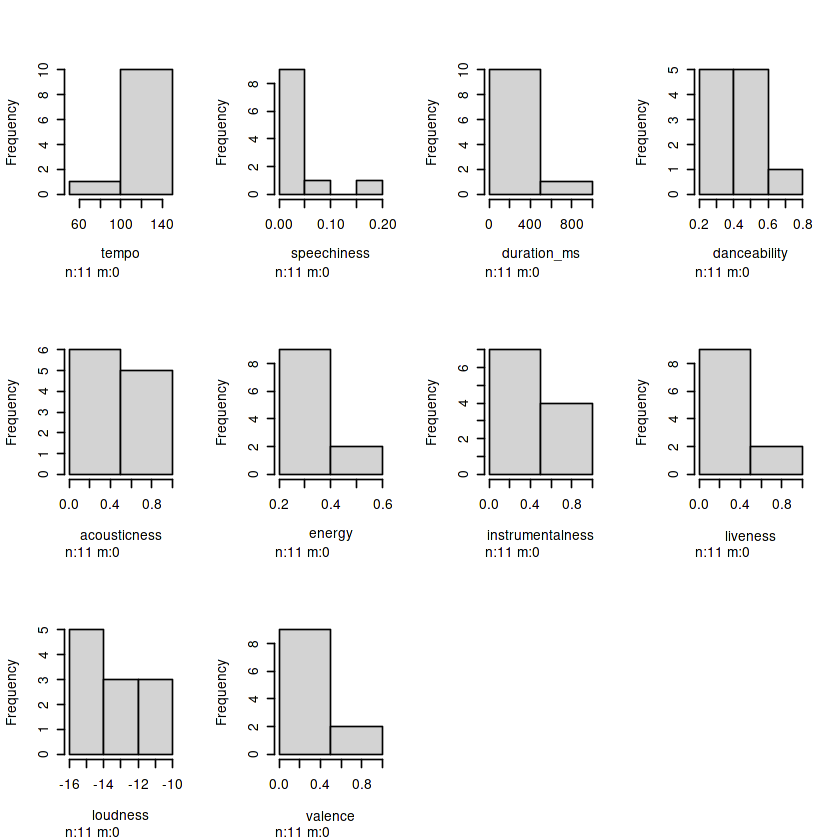

In [41]:
hist(df_pink_floyd_clean)

In [42]:
summarise_if(df_pink_floyd_clean, is.numeric, mean)

tempo,speechiness,duration_ms,danceability,acousticness,energy,explicit,instrumentalness,liveness,loudness,valence
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
118.166,0.04929091,362.8532,0.4283636,0.4177091,0.3447273,0,0.3208843,0.2791727,-13.65636,0.3096091


Features were Pink Floyd fails

loudness
explicit
danceability
valance
energy